# 시계열 분석

## 1) ARIMA 모델

In [1]:
# ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

C:\Users\AIFFEL\AppData\Local\Temp\ipykernel_14776\4273972342.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def parser(x):
    r"""
    시간을 표현하는 함수
    """
    return datetime.strptime('199'+x, '%Y-%m')

C:\Users\AIFFEL\AppData\Local\Temp\ipykernel_14776\1619899413.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv("./data/sales.csv", header=0, index_col=0, squeeze=True, parse_dates=[0], date_parser=parser)
C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, fr

                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                                       Tue, 31 Jan 2023   AIC                            408.969
Time:                                               17:35:57   BIC                            418.301
Sample:                                           01-01-1991   HQIC                           412.191
                                                - 12-01-1993                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014     

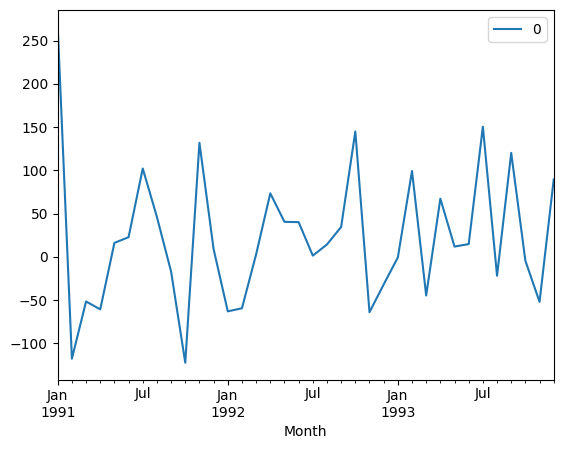

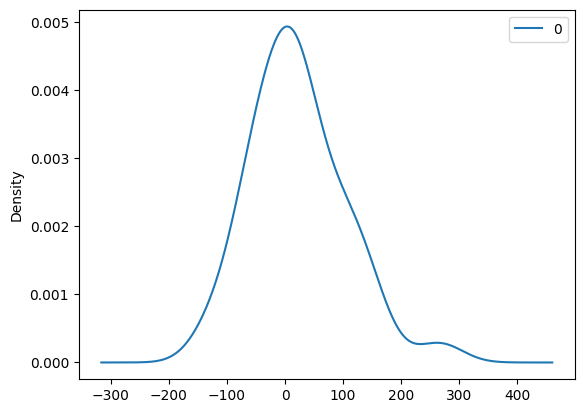

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [3]:
series = read_csv("./data/sales.csv", header=0, index_col=0, squeeze=True, parse_dates=[0], date_parser=parser)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

residuals = DataFrame(model_fit.resid) # DataFrame에 모델에 대한 오차 정보를 저장
residuals.plot() # residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [4]:
# statsmodels 라이브러리를 이용한 sales 데이터셋 예측
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\AIFFEL\AppData\Local\Temp\ipykernel_14776\290967572.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [5]:
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

C:\Users\AIFFEL\AppData\Local\Temp\ipykernel_14776\506807971.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


predicted=343.272180, expected=342.300000
predicted=369.407349, expected=339.700000
predicted=336.235996, expected=440.400000
predicted=363.326475, expected=315.900000
predicted=351.754742, expected=439.300000
predicted=372.996806, expected=401.300000
predicted=372.164816, expected=437.400000
predicted=392.204128, expected=575.500000
predicted=415.554916, expected=407.600000
predicted=423.968005, expected=682.000000
predicted=455.667206, expected=475.300000
predicted=460.498087, expected=581.300000
predicted=477.448511, expected=646.900000
Test MSE: 13125.944


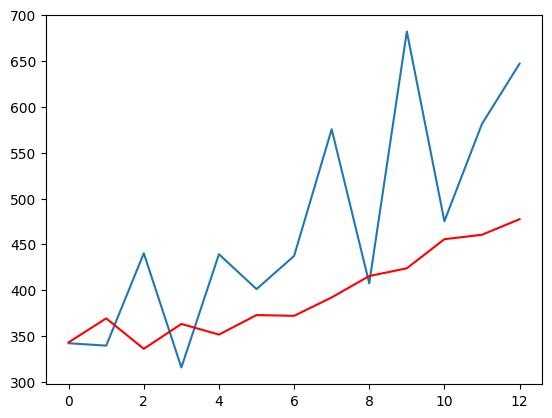

In [6]:
series = read_csv('./data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) # ARIMA() 호출
    model_fit = model.fit() # fit() 호출
    output = model_fit.forecast() # forecast() 함수로 예측 수행
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    history.append(obs)
    print("predicted=%f, expected=%f" % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print("Test MSE: %.3f" % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()